In [63]:
%matplotlib inline
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import warnings
from collections import Counter
import sys
import os
from __future__ import division
plt.rcParams["figure.figsize"] = (20,10)
import tqdm as tqdm

warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

Get information about each of the books in the dataset.

In [64]:
books = []
for i in range(5):
    books.append(pd.read_csv('data/asoiaf-book{}-edges.csv'.format(i+1)))

Now concatenate information about each of the books into a single dataframe.

In [65]:
all_books = pd.concat(books)

In [66]:
all_books.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1.0
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1.0
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1.0
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1.0
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1.0


In [67]:
all_books.tail()

,Source,Target,Type,weight,book
755,Tyrion-Lannister,Ysilla,undirected,11,5.0
756,Tywin-Lannister,Wylis-Manderly,undirected,3,5.0
757,Victarion-Greyjoy,Wulfe,undirected,3,5.0
758,Walder-Frey-(son-of-Jammos),Walder-Frey-(son-of-Merrett),undirected,10,5.0
759,Yandry,Ysilla,undirected,14,5.0


Group the edges which are between the same source and target and aggregate their weights.

Reset the indices and sort by weight. 

Create a social network graph using the collected information about the edges.

In [68]:
edges = all_books.groupby(['Source','Target']).agg({'weight':'sum'}).reset_index()
print(edges.sort_values('weight',ascending=False).head())
print(edges.sort_values('weight',ascending=False).tail())
GOT = nx.from_pandas_edgelist(edges, 
                            source='Source',
                            target='Target',
                            edge_attr='weight' )

                 Source            Target  weight
1334       Eddard-Stark  Robert-Baratheon     334
2031           Jon-Snow     Samwell-Tarly     228
1965  Joffrey-Baratheon       Sansa-Stark     222
1972  Joffrey-Baratheon  Tyrion-Lannister     219
640          Bran-Stark             Hodor     209
                     Source              Target  weight
1809        Jaime-Lannister            Joy-Hill       3
1805        Jaime-Lannister            Jon-Snow       3
1802          Jafer-Flowers       Jaremy-Rykker       3
1801  Jaehaerys-I-Targaryen  Maegor-I-Targaryen       3
0            Addam-Marbrand       Brynden-Tully       3


In [69]:
weighted_degrees = dict(nx.degree(GOT,weight='weight'))

Create a subgraph of only the most mportant characters in the whole series.

In [70]:
subG = GOT.subgraph([n for n in weighted_degrees if weighted_degrees[n]>200])

Plot the subgraph using the `networkx` package.

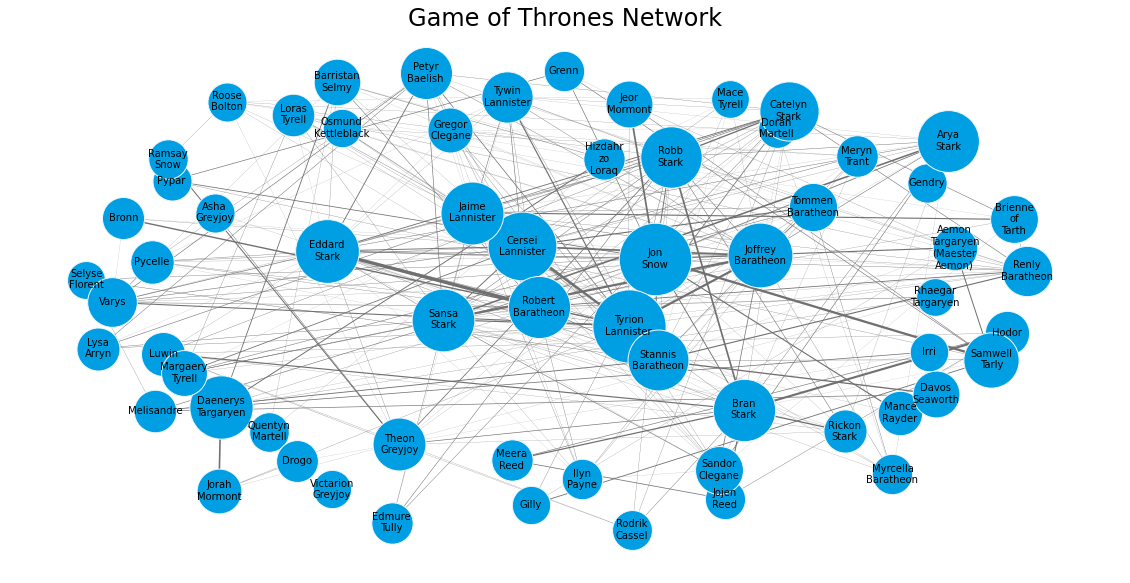

In [71]:
pos = nx.spring_layout(subG,weight='weight',iterations=20, k = 4)
plt.axis('off')
plt.title('Game of Thrones Network',fontsize = 24)


for node in subG.nodes():
    size = 100*weighted_degrees[node]**0.5
    ns = nx.draw_networkx_nodes(subG,pos,nodelist=[node], node_size=size, node_color='#009fe3')
    ns.set_edgecolor('#f2f6fa')

nx.draw_networkx_labels(subG,pos,{n:n.replace('-','\n') for n in subG.nodes() if weighted_degrees[n]>100},font_size=10);

for e in subG.edges(data=True):
    if e[2]['weight']>10:
        nx.draw_networkx_edges(subG,pos,[e],width=e[2]['weight']/100,edge_color='#707070')

In [72]:
top = pd.DataFrame.from_dict(dict(nx.degree(subG)),orient='index').sort_values(0,ascending=False)
top.columns = ['Degree']
top['Betweenness'] =  pd.DataFrame.from_dict(dict(nx.betweenness_centrality(subG,weight='weight')),orient='index')
print(top.head())
print(top.tail())

                   Degree  Betweenness
Tyrion-Lannister       40     0.036445
Robert-Baratheon       37     0.223912
Joffrey-Baratheon      35     0.033051
Cersei-Lannister       34     0.004671
Eddard-Stark           34     0.024061
                   Degree  Betweenness
Irri                    4     0.029614
Asha-Greyjoy            4     0.000000
Hizdahr-zo-Loraq        4     0.000529
Quentyn-Martell         4     0.002115
Victarion-Greyjoy       3     0.000793


In [73]:
import operator
def plot_G(i):
    subG1 = nx.Graph(subG)
    nodes_list = dict(nx.betweenness_centrality(subG,weight='weight'))
    sorted_x = sorted(nodes_list.items(), key=operator.itemgetter(1), reverse=True)
    sorted_x = sorted_x[0:i]
    f = 0
    for j, k in sorted_x:
        if f > i:
            break
        f = f + 1
        subG1.remove_node(j)
    pos = nx.spring_layout(subG1,weight='weight',iterations=20, k = 4)
    plt.figure()
    plt.axis('off')
    plt.title('Game of Thrones Network',fontsize = 24)


    for node in subG1.nodes():
        size = 100*weighted_degrees[node]**0.5
        ns = nx.draw_networkx_nodes(subG1,pos,nodelist=[node], node_size=size, node_color='#009fe3')
        ns.set_edgecolor('#f2f6fa')

    nx.draw_networkx_labels(subG1,pos,{n:n.replace('-','\n') for n in subG1.nodes() if weighted_degrees[n]>100},font_size=10);

    for e in subG1.edges(data=True):
        if e[2]['weight']>10:
            nx.draw_networkx_edges(subG1,pos,[e],width=e[2]['weight']/100,edge_color='#707070')

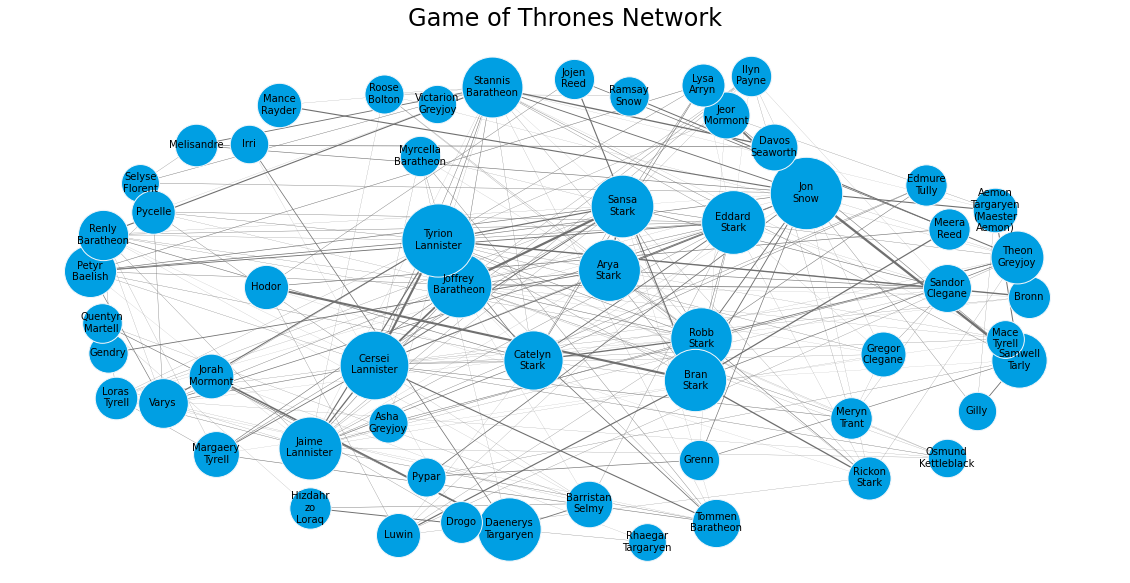

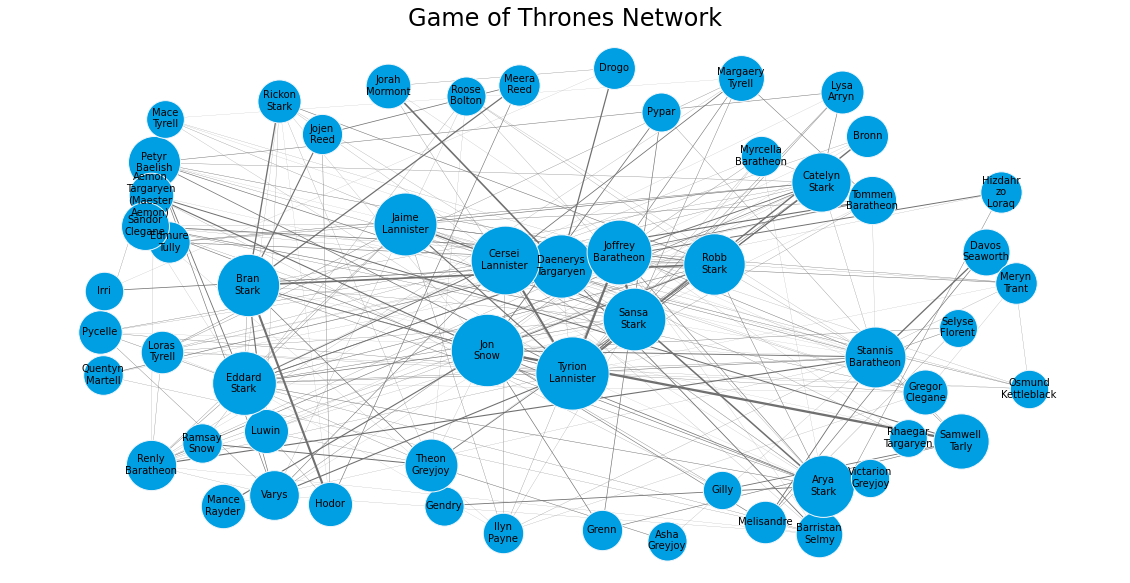

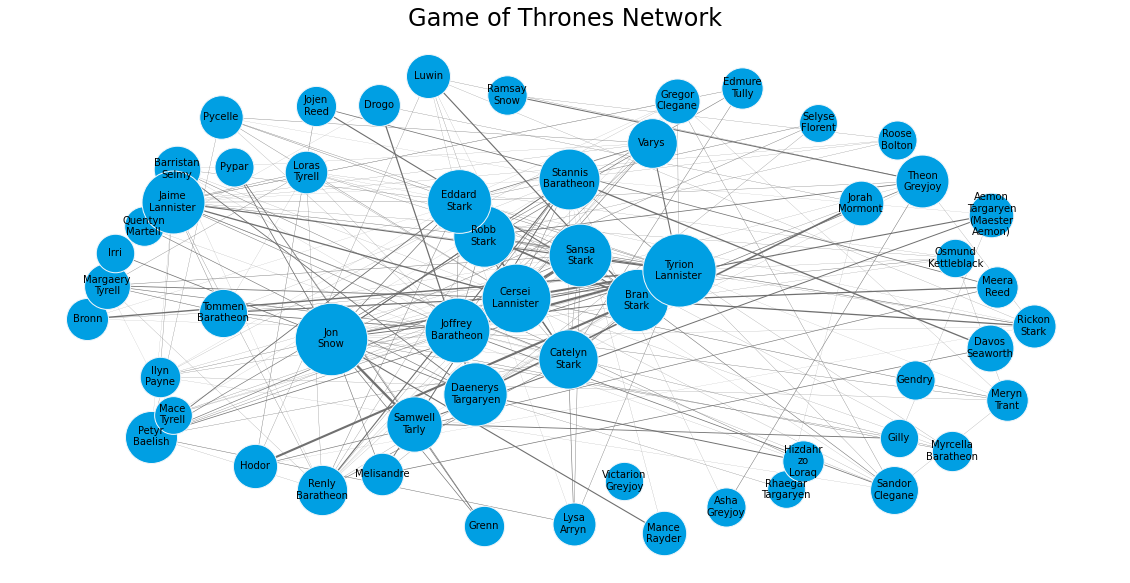

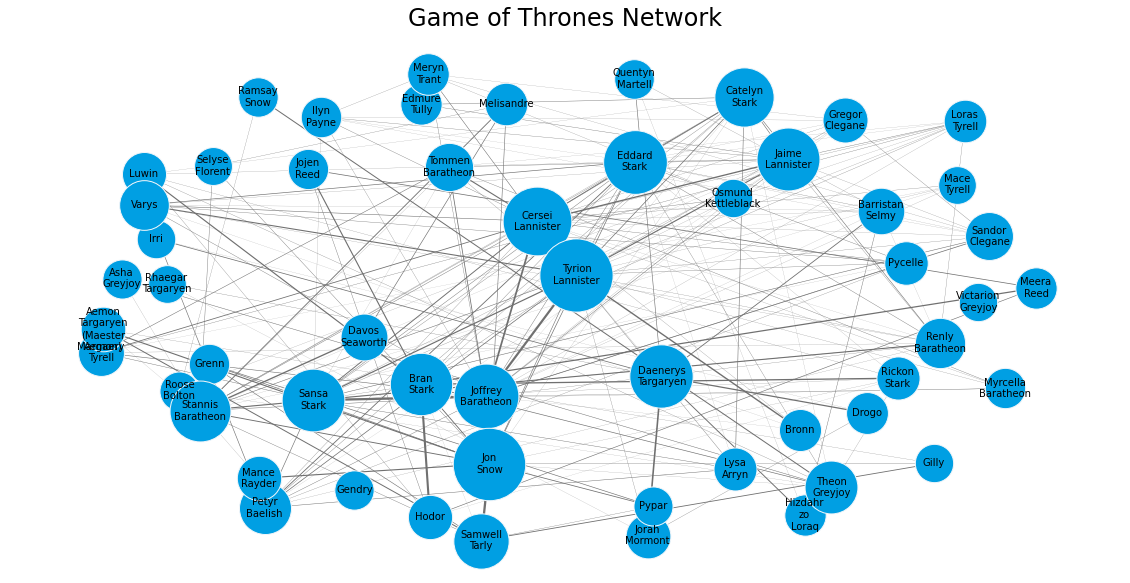

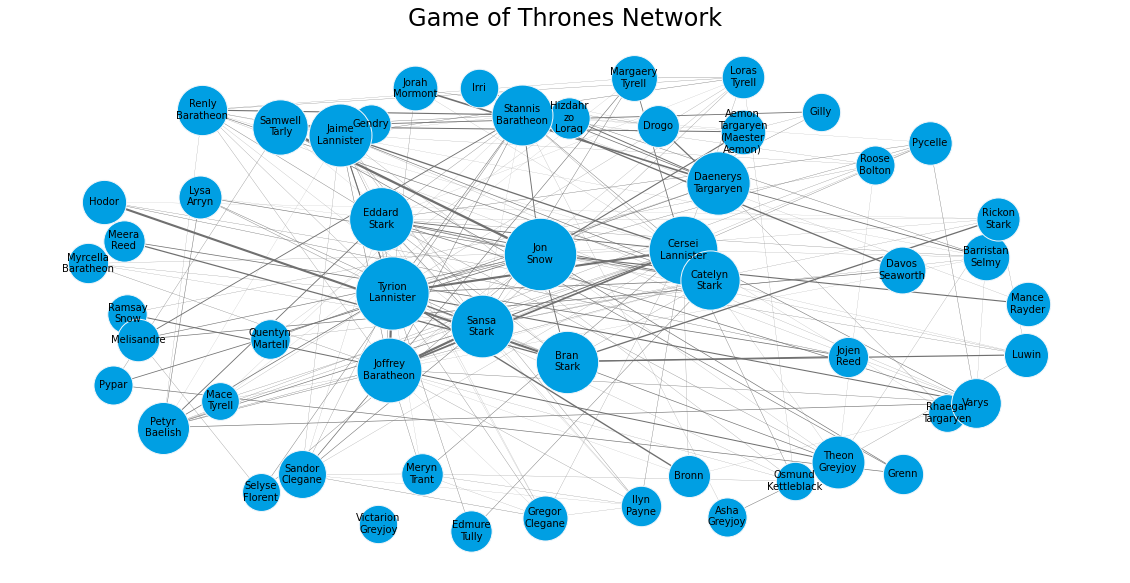

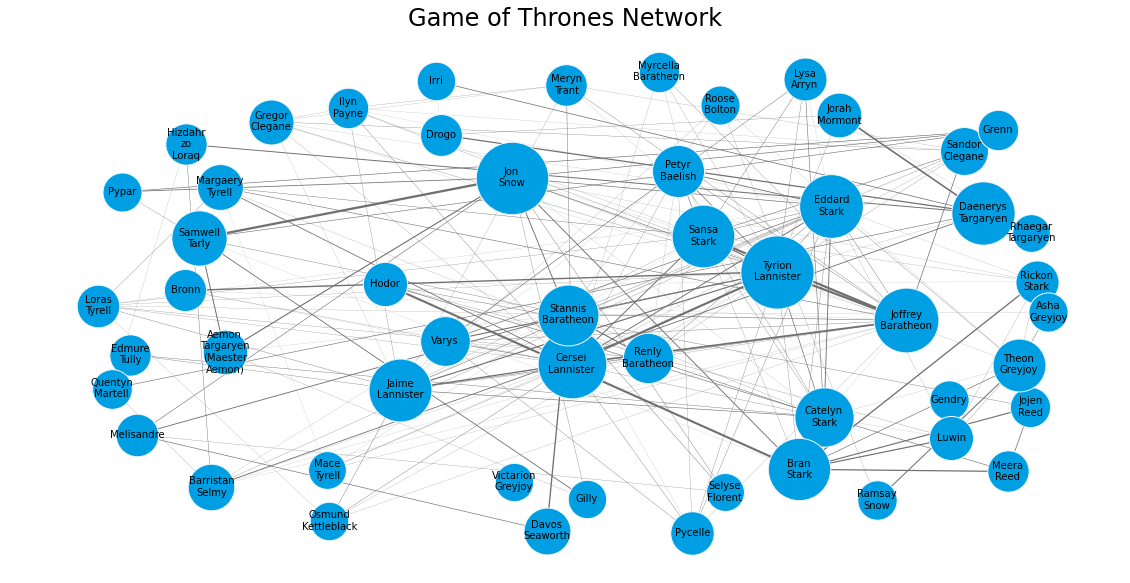

In [74]:
for i in [5, 6, 7, 8, 9, 10]:
    plot_G(i)